In [3]:
outdir = '/tigress/changgoo/public_html/TIGRESS-NCR/lowZ-figures/'

In [4]:
Y0=dict(th=414.,turb=615.,mag=481.,nonth=1.23e3)
s1=dict(th=-0.46,turb=-0.22,mag=-0.38,nonth=-0.22)
s2=dict(th=-0.50,turb=0.0,mag=-0.54,nonth=-0.15)

In [5]:
import numpy as np
Z=np.logspace(-2,1,300)
W=np.logspace(1,7,600)

In [6]:
import xarray as xr
Y=xr.Dataset()

In [7]:
Z0=0.1
p=0
for c in Y0:
    Yfit = Y0[c]*(W[:,np.newaxis]/1.e4)**s1[c]*Z[np.newaxis,:]**s2[c]
    if p>0: Yfit *= (1+(Z0/Z[np.newaxis,:])**p)**(s2[c]/p)
    Y[c] = xr.DataArray(Yfit,
                        coords=[W,Z],dims=['W','Z'])

Y['tot'] = Y['th'] + Y['nonth']

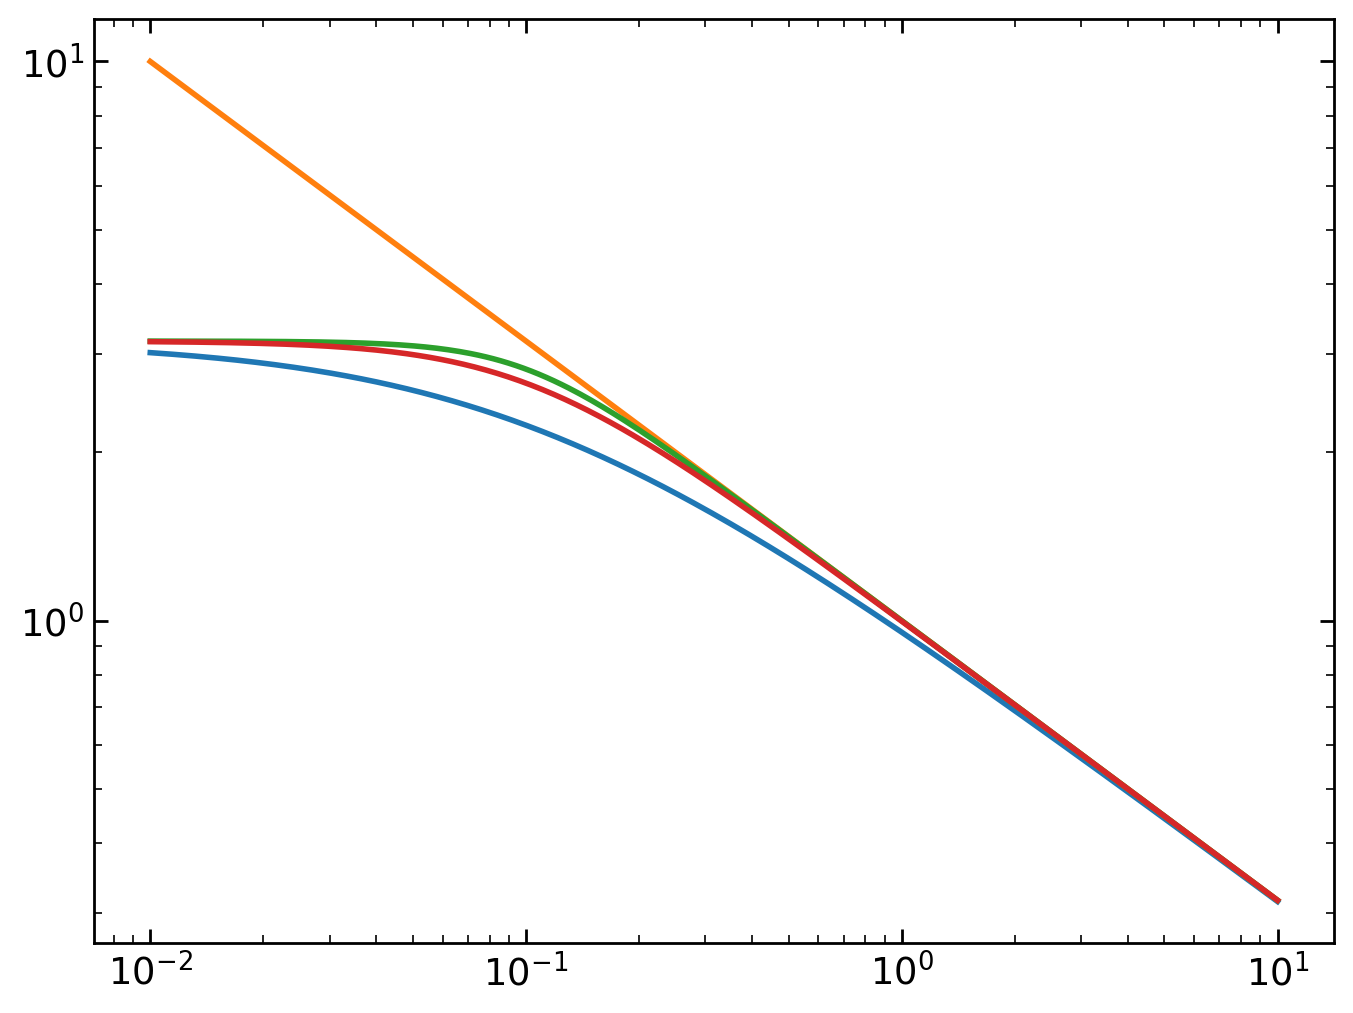

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ncr-paper.mplstyle')
plt.rcParams['axes.grid']=False

plt.plot(Z,(Z+0.1)**s2['th'])
plt.plot(Z,(Z)**s2['th'])
plt.plot(Z,(Z**3+0.1**3)**(s2['th']/3))
plt.plot(Z,(Z**2+0.1**2)**(s2['th']/2))
plt.yscale('log')
plt.xscale('log')

In [9]:
# calculate critical weight at Yth/Ynonth = 1,3,10
f = np.array([1,3,10])
f0 = (Y0['th']/Y0['nonth']*f)**(1/0.24)
print(f0)
print("slope:",-0.35/0.24)

# power in smoothing function
p = 3
Wcrit = [f0_*1.e4*Y.Z**(-1.46)*(1+(0.1/Y.Z)**p)**(-1.46/p) for f0_ in f0]

[1.07044278e-02 1.04128278e+00 1.57119513e+02]
slope: -1.4583333333333333


In [10]:
import astropy.units as au
import astropy.constants as ac
yield_conv = ((au.cm**(-3)*au.K*ac.k_B)/(ac.M_sun/ac.kpc**2/au.yr)).to('km/s').value

In [13]:
SFR = np.logspace(-4,-1)
Pratio=2
Sigma_gas=10
for Z_ in [0.1, 1]:
    Ptwo = 3.5e6*np.sqrt(Pratio)/(1+3.1*(Z_*Sigma_gas/10)**0.365)
    print(Z_,Ptwo,(Y['th']).interp(Z=Z_,W=1.e4).data)

0.1 2117349.5827581435 1309.2997994801296
1 1207255.4800745933 414.03685609458194


R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4_4pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4_4pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8


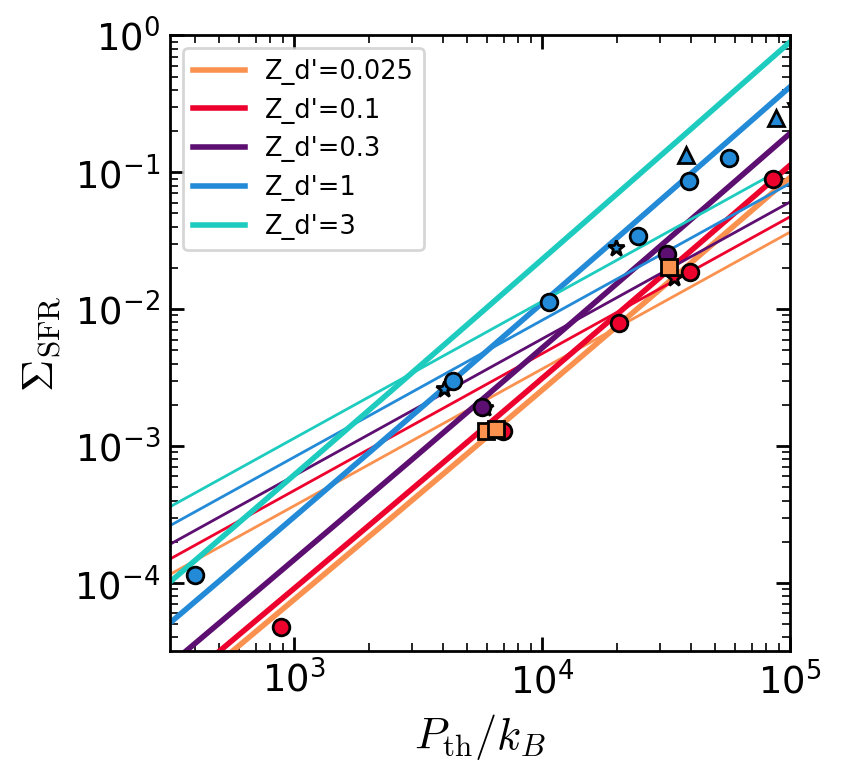

In [12]:
plt.figure(figsize=(4,4))
cmap=cmr.guppy
Zmin=-1.3
Zmax=0.3
norm = Normalize(vmin=Zmin, vmax=Zmax)

Zlist = [0.025, 0.1, 0.3, 1, 3]
clist = cmr.get_sub_cmap('cmr.gothic',0.2,0.7,N=len(Zlist)).colors
for Z_,c_ in zip(Zlist,clist):
    c_ = cmap(norm(np.log10(Z_)))
    plt.plot((Y.W*Y['th']/Y['tot']).interp(Z=Z_),
             yield_conv*(Y.W/Y['tot']).interp(Z=Z_),color=c_,
             label=f"Z_d'={Z_}")

    # HC17 Equation 14
    SFR = np.logspace(-4,-1)
    Pratio=2
    Sigma_gas=10
    Ptwo = 3.5e6*np.sqrt(Pratio)*SFR/(1+3.1*(Z_*Sigma_gas/10)**0.365)

    plt.plot(Ptwo,SFR,color=c_,lw=1)
plt.legend(fontsize='xx-small')
plt.xlabel(r'$P_{\rm th}/k_B$')
plt.ylabel(r'$\Sigma_{\rm SFR}$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**2.5,1.e5)
plt.ylim(10**(-4.5),1)

with xr.open_dataarray('percentiles_all.nc') as qdset:
    qdset = qdset.sel(q='mean')


for name in qdset['name'].data:
    print(name)
    if 'Zd0.025' in name:
        marker='s'
    elif 'Om01' in name:
        marker='v'
    elif 'Om02' in name:
        marker='^'
    elif 'b10' in name and not 'S05' in name:
        marker='*'
    else:
        marker='o'
    i0 = name.rfind('Zd')
    i1 = name[i0:].rfind('.xy')
    Zdust = float(name[i0+2:i0+i1])
    c = cmap(norm(np.log10(Zdust)))

    plt.plot(qdset.sel(name=name).sel(variable='Pth'),
             qdset.sel(name=name).sel(variable='sfr'),
             color=c,marker=marker,mew=1,mec='k')


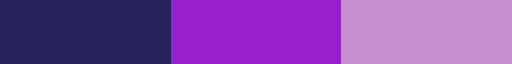

In [ ]:
cmr.get_sub_cmap('cmr.gothic',0.2,0.7,N=len(Zlist))

In [ ]:
qdset.sel(name=name).sel(variable='Pth')

<xarray.DataArray ()>
[1 values with dtype=float64]
Coordinates:
    name      <U65 'LGR2_4pc_NCR_S150.full.b2.Om01.q0.v3.iCR5.Zg1.Zd1.xy1024....
    variable  <U3 'Pth'
    q         <U4 'mean'